In [1]:
%matplotlib inline

import pandas as pd

from sklearn.model_selection import train_test_split

import xgboost as xgb

import matplotlib.pyplot as plt

In [2]:
df_X = pd.read_csv('../INSERT_PATH/train_features_augTabularKggl_contextual_embedding1.csv')
df_y = pd.read_csv('../INSERT_PATH/train_labels_augTabularKggl_forcontextualembedding1.csv')

In [3]:
print(df_X.shape, df_y.shape)

(26570, 768) (26570, 1)


In [4]:
df_X.head(3)

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.4377,-1.567,2.1100,1.355,-0.08940,0.6440,-1.9550,-0.4302,-0.54440,-1.1220,...,3.148,-0.70170,-1.2850,-0.0976,0.3857,-0.1011,0.5405,-0.701,0.48580,2.2500
1,0.4707,2.066,-1.3090,-2.193,0.01894,0.7197,-1.1170,-1.1130,-0.02931,-0.4336,...,1.069,0.36300,0.2883,-0.2210,0.2540,-0.2186,-1.7340,-0.828,-0.62000,-0.3735
2,0.5700,0.857,0.7754,-1.725,0.35160,2.1480,0.1236,0.2534,0.09265,-1.1820,...,1.224,0.02013,-0.6226,1.2070,-0.7160,-0.2317,1.0340,-1.053,0.11743,1.0170


In [5]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2) # 0.33 #, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(21256, 768) (5314, 768) (21256, 1) (5314, 1)


### Address class imbalance in target

(simple example, see: https://www.kaggle.com/code/ryanluoli2/blended-6-models-for-a-better-score)

In [6]:
from imblearn.over_sampling import SMOTE

In [9]:
print(X_train.shape)

oversample = SMOTE()

X_train, y_train = oversample.fit_resample(X_train, y_train)

print(X_train.shape)

(21256, 768)
(33490, 768)


In [12]:
y_train

,0
0,0
1,0
2,0
3,0
4,1
...,...
33485,1
33486,1
33487,1
33488,1


### Create baseline xgboost classifier

In [10]:
xgb_clf = xgb.XGBClassifier()

In [11]:
xgb_clf.fit(X_train, y_train)

C:\Users\m85302\Anaconda3b\envs\seqDarts1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\m85302\Anaconda3b\envs\seqDarts1\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\m85302\Anaconda3b\envs\seqDarts1\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using 

[23:35:56] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [13]:
y_pred = xgb_clf.predict(X_test)

In [14]:
def eval_ml_model(label, y_test_in, y_pred_in):
    """
    Evaluate maching learning (ML) model, binary classification
    """
    # ML model evaluation
    from sklearn.metrics import accuracy_score, precision_score
    from sklearn.metrics import recall_score, f1_score, roc_auc_score
    from sklearn.metrics import confusion_matrix    
    
    print(label)
    print(" ")
    
    score_accuracy = accuracy_score(y_test_in, y_pred_in)
    score_precision = precision_score(y_test_in, y_pred_in)
    score_recall = recall_score(y_test_in, y_pred_in)
    score_f1 = f1_score(y_test_in, y_pred_in)
    score_roc_auc = roc_auc_score(y_test_in, y_pred_in)
    score_confmat = confusion_matrix(y_test_in, y_pred_in)
    
    print('Accuracy: ', score_accuracy)
    print('Precision: ', score_precision)
    print('Recall: ', score_recall)
    print('F1: ', score_f1)
    print('ROC_AUC:', score_roc_auc)
    print(score_confmat)
    viz_confusion_matrix(score_confmat)
    print(" ")

In [15]:
def viz_confusion_matrix(confmat):
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('predicted label')
    plt.ylabel('true label')

    plt.tight_layout()
    # plt.savefig('./figures/confusion_matrix.png', dpi=300)
    plt.show()

Label
 
Accuracy:  0.681972149040271
Precision:  0.2361376673040153
Recall:  0.21704745166959577
F1:  0.2261904761904762
ROC_AUC: 0.5128580170225373
[[3377  799]
 [ 891  247]]


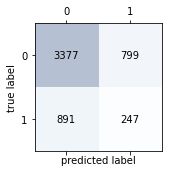

In [16]:
eval_ml_model('Label', y_test, y_pred)